## equity price in sector

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline


# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

from IPython.display import display
# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

import os
import sys
import seaborn as sns
# from pathlib import Path
# _this_dir = Path(__file__).parent.parent
from dataset.us_equity_load import *
from utils.us_equity_utils import *

from factor.xq_finance import *
from dataset.us_equity_load import *
from factor.price import*


In [2]:

# sector_name = "IT_Services"
# sector_name = "Entertainment"
sector_name = "Semiconductors_Equipment"
# sector_name = "Automobiles"
# sector_name = "Internet_Retail"
# sector_name = "Electronic_Equipment_Instruments_Components"

symbols = us_equity_symbol_load()

symbols = us_dir0_load_csv(dir0 = 'symbol', filename= sector_name +'.csv')['symbol'].values

print("symbol list len ", len(symbols))
check_factors = ['pe', 'ps', 'market_capital']
rank_factors = ['roe', 'roa', 'gross_profit_revenue', 'profit_revenue', 'revenue_increase_q2q_rate', 'cash_increase_q2q_rate', 'profit_increase_q2q_rate']
factors = check_factors + rank_factors

start_date = '2022-06-01'
end_date = '2024-06-01'
us_analysis_finance = xq_finance(symbols, factors,  start_date, end_date)
result = us_analysis_finance.finance_factors_rank(rank_factors)

us_equity_research_folder("finance", sector_name + start_date + "_" + end_date + ".csv", result[2])

# finance_with_price_=finance_calculate_ratio_changes(result[2], 5, 0)
# finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 5)
finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 20)
finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 40)
finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 60)




# us_equity_research_folder("finance", 'finance_factors_rank.csv', result)
# print(result)
display(result[0])
display(result[1])

# Create a categorical column with the desired order
symbol_order = result[0].index.values
finance_with_price_ = finance_with_price_.reset_index()
finance_with_price_['symbol'] = pd.Categorical(finance_with_price_['symbol'], categories=symbol_order, ordered=True)
finance_with_price_ = finance_with_price_.sort_values(by=['symbol', 'REPORT']).set_index(['REPORT', 'symbol'])
display(finance_with_price_)




# finance_with_price_reorder_ = reorder_index_level(finance_with_price_.copy(), 1, result[0].index.values)
# display(finance_with_price_reorder_)

symbol list len  101
no finance data skip stock AVGOP
no finance data skip stock BRKS
no finance data skip stock CCMP
no finance data skip stock CREE
no finance data skip stock DSPG
no finance data skip stock MMAT
no finance data skip stock MOSY
no finance data skip stock MXIM
no finance data skip stock NAL
no finance data skip stock NPTN
no finance data skip stock OIIM
no finance data skip stock RBCN
no finance data skip stock RESN
no finance data skip stock TYGOW
no finance data skip stock XLNX


,roe,roa,gross_profit_revenue,profit_revenue,revenue_increase_q2q_rate,cash_increase_q2q_rate,profit_increase_q2q_rate,mean_scale
symbol,,,,,,,,
NVDA,16.23,9.85,65.42,35.32,72.45,175.90,256.71,79.71
RMBS,5.55,4.53,77.25,45.05,10.92,74.49,2573.66,72.86
LSCC,9.51,6.63,69.28,29.66,7.64,94.68,27.13,71.00
AVGO,12.01,3.79,66.64,32.41,15.58,68.18,5.42,67.29
STM,8.46,5.33,47.39,25.33,15.16,98.34,43.06,66.86
TSM,7.62,4.61,56.56,41.13,12.93,48.50,16.73,65.00
ACLS,7.48,5.05,43.82,20.77,15.73,109.28,27.44,63.29
MPWR,6.28,5.10,56.90,23.73,13.26,49.20,18.29,63.29
KLAC,32.10,5.58,59.85,30.06,4.07,41.26,-5.90,62.71


,roe,roa,gross_profit_revenue,profit_revenue,revenue_increase_q2q_rate,cash_increase_q2q_rate,profit_increase_q2q_rate,mean_scale
symbol,,,,,,,,
NVDA,81.0,86.0,75.0,79.0,83.0,75.0,79.0,79.71
RMBS,63.0,74.0,82.0,82.0,66.0,59.0,84.0,72.86
LSCC,73.0,85.0,80.0,74.0,61.0,63.0,61.0,71.00
AVGO,77.0,68.0,77.0,76.0,73.0,56.0,44.0,67.29
STM,71.0,80.0,47.0,66.0,72.0,65.0,67.0,66.86
TSM,69.0,75.0,61.0,81.0,69.0,44.0,56.0,65.00
ACLS,68.0,78.0,37.0,58.0,74.0,66.0,62.0,63.29
MPWR,66.0,79.0,63.0,61.0,70.0,45.0,59.0,63.29
KLAC,84.0,81.0,70.0,75.0,56.0,38.0,35.0,62.71


,,roe,roa,gross_profit_revenue,profit_revenue,revenue_increase_q2q_rate,cash_increase_q2q_rate,profit_increase_q2q_rate,p_0D_20D,p_0D_40D,p_0D_60D
REPORT,symbol,,,,,,,,,,
2022-07-30 16:00:00.000,NVDA,2.75,1.51,43.48,9.79,-5.62,-50.60,-73.38,-14.32,-32.69,-28.09
2022-10-29 16:00:00.000,NVDA,3.19,1.68,53.57,11.47,-22.40,-62.75,-77.36,15.87,3.99,50.89
2023-01-28 16:00:00.005,NVDA,6.40,3.43,63.34,23.37,-26.99,225.88,-12.61,21.16,37.82,40.67
2023-04-29 16:00:00.000,NVDA,8.33,4.60,64.63,28.41,7.28,-3.00,211.43,38.74,42.22,58.77
2023-07-29 16:00:00.000,NVDA,22.50,12.49,70.05,45.82,127.74,172.89,810.15,0.23,-10.31,-6.56
2023-10-28 16:00:00.000,NVDA,27.79,17.07,73.95,51.01,199.45,194.11,553.68,16.18,20.06,48.27
2024-01-27 16:00:00.005,NVDA,28.58,18.69,75.97,55.58,207.33,864.96,501.32,25.99,48.18,27.55
2024-04-27 16:00:00.000,NVDA,30.28,19.31,78.35,57.14,92.82,65.73,140.44,29.79,44.03,47.27
2022-06-29 16:00:00.000,RMBS,4.18,3.15,79.52,28.91,49.03,-27.68,852.67,17.64,22.52,15.64


date  2024-07-08
POET  167.499993
NVDA  105.234926
NVMI   63.669228
CRUS   62.266729
TSM    59.540092
SMTC   58.407490
ASYS   56.028366
CRDO   50.354609
FORM   47.511303
MU     46.727296
VECO   46.278702
AMAT   46.183523
TER    45.347411
KLAC   44.405740
AVGO   43.365328
ONTO   41.314523
GSIT   40.625006
TSEM   39.856804
UCTT   39.525295
QCOM   38.926758
MPWR   37.439086
SIMO   36.974653
AOSL   35.763514
HIMX   35.630251
AXTI   32.950198
MTSI   31.808036
LRCX   30.244739
NXPI   27.475054
ACMR   25.279403
ASX    24.261607
OLED   23.837884
AMKR   23.260733
ASML   22.067257
TXN    21.338237
AIP    20.952375
SITM   19.560103
ADI    18.326572
QRVO   16.509164
ENTG   15.066271
ALGM   14.682252
DIOD   12.125593
SGH    11.858072
CSLR   11.278193
ICHR    9.884328
UMC     9.759189
AMBA    8.315642
MCHP    6.912758
ACLS    6.851664
MRVL    6.800690
NXT     6.551190
TYGO    4.666670
COHU    3.603872
ON      2.725288
MXL     2.064628
VSH     0.806092
AMD     0.483608
SWKS    0.216670
IMOS   -1.5521

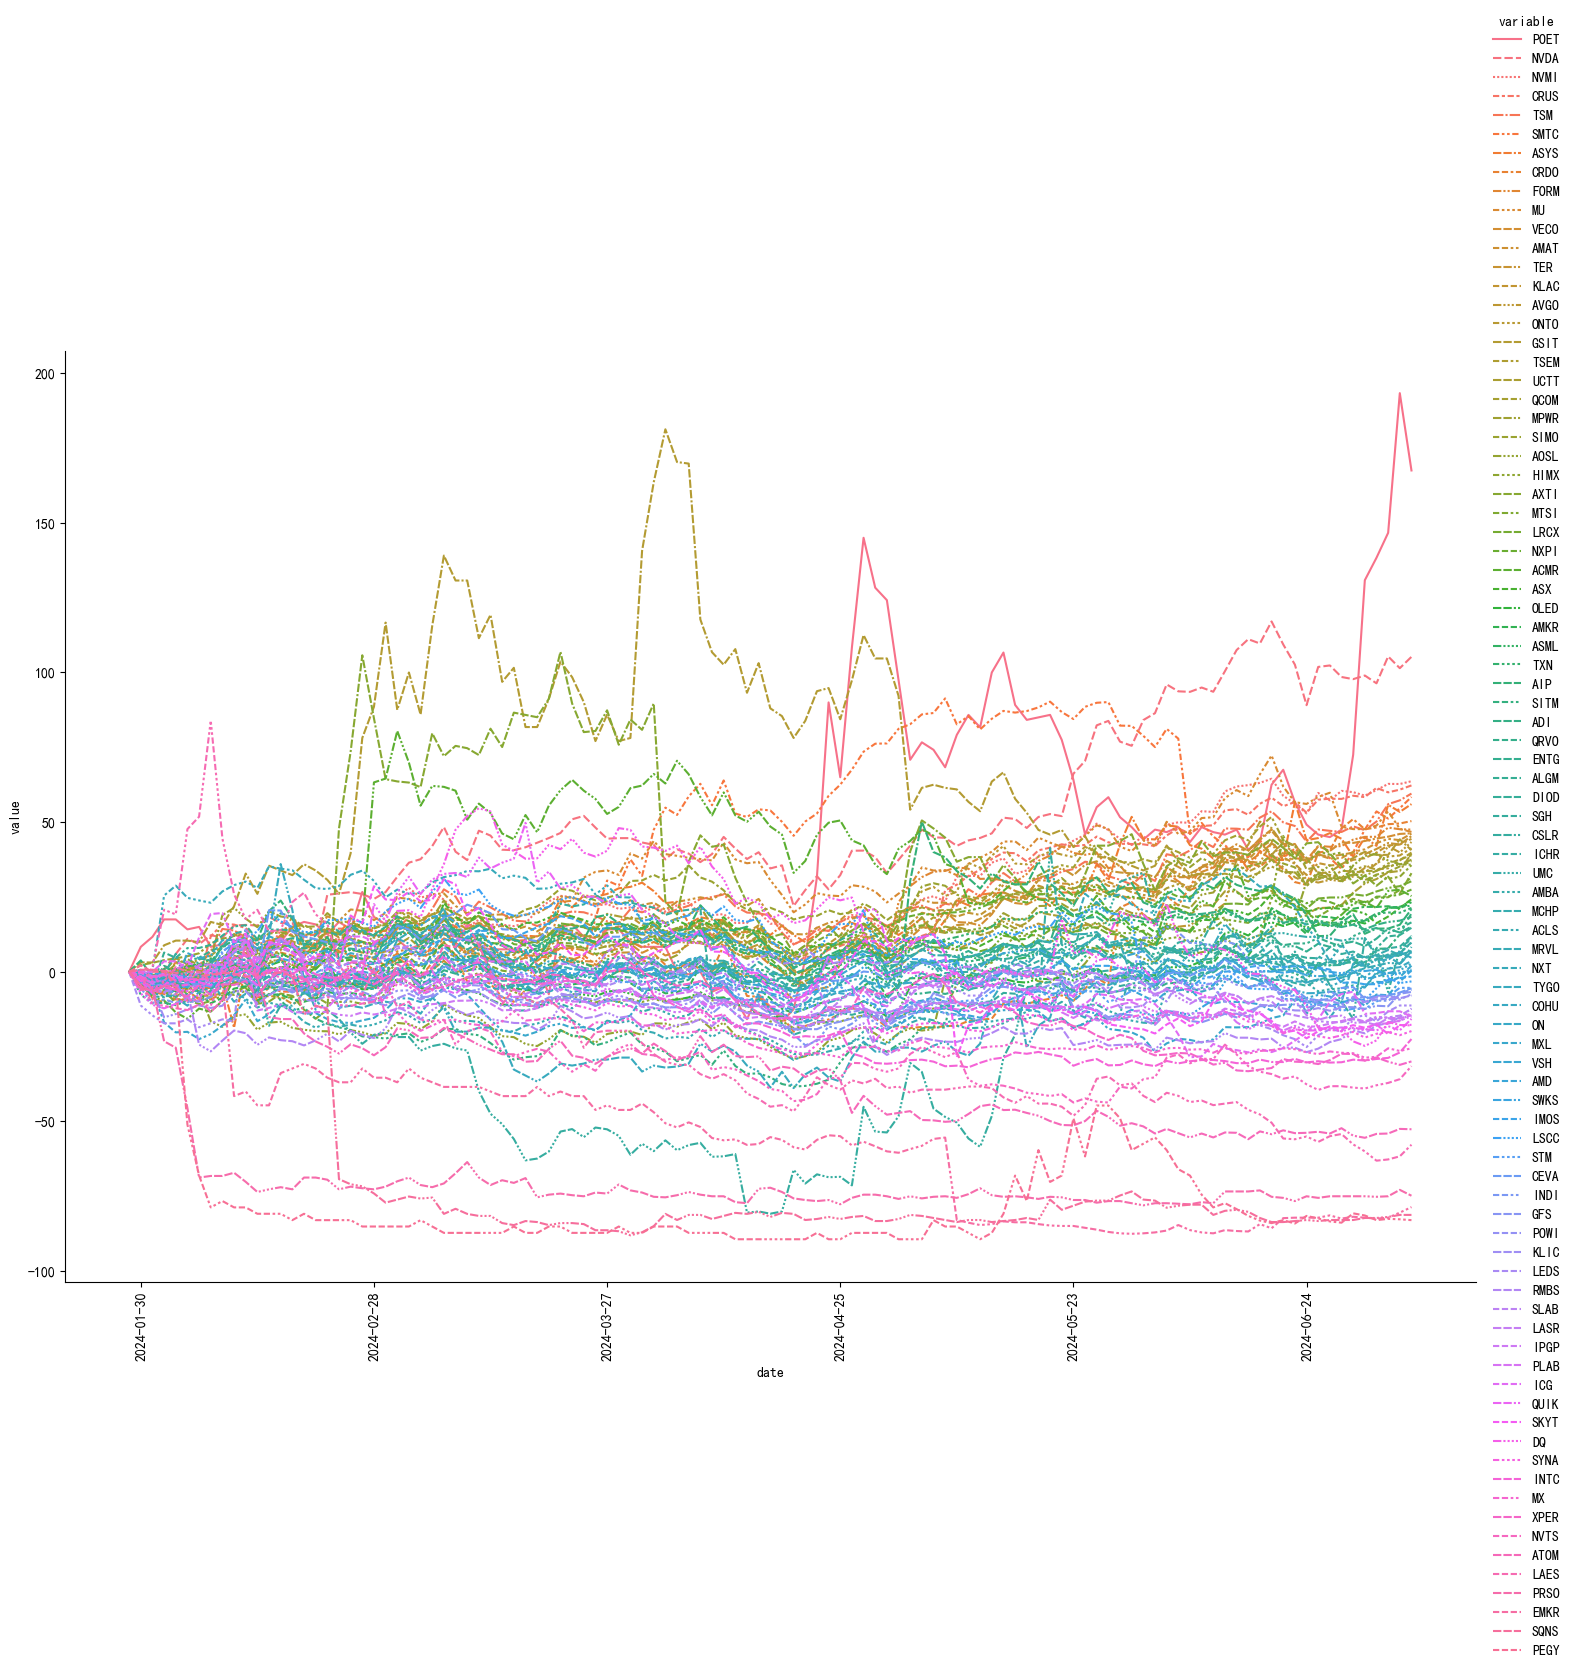

In [3]:
from utils.us_equity_utils import *

# symbols = ["AMZN", "AAPL", "NFLX", "GOOG"]
symbols = result[0].index
# symbols = us_equity_symbol_load().head(2000)
# data = us_equity_daily_data_load(symbols = symbols, option = 'close')

start_date = '2024-01-29'
end_date = '2024-07-08'

data = us_equity_daily_data_load(symbols = symbols, start_date = start_date, end_date = end_date, trade_option = 'close')
data = pd.DataFrame(data)
data = data.sub(data.iloc[0, :], axis=1).div(data.iloc[0, :], axis=1) * 100

sorted_columns = data.iloc[-1].sort_values(ascending=False).index
data = data[sorted_columns]
# data = data.loc[:, data.iloc[-1] > 30]

file = sector_name + start_date + "_" + end_date + ".csv"
folder = us_equity_research_folder(sub_folder = "price", file_name = file, data = data)

print(data.tail(1).transpose())

# Convert the DataFrame to long format
df_long = data.reset_index().melt(id_vars='date', var_name='variable', value_name='value')

# Create a line plot using Seaborn's relplot
g = sns.relplot(
    data=df_long, 
    x='date', 
    y='value', 
    hue='variable', 
    kind='line',
    style='variable',  # Different line styles for each variable
    height=10,    # Height of each facet
    aspect=1.5  # Aspect ratio of each facet
)


# Rotate x-axis labels and set only a subset of ticks
for ax in g.axes.flat:
    x = data.index[1:-1:20]
    ax.set_xticks(x)  # Set the desired tick positions
    ax.set_xticklabels(x)  # Set the desired tick labels
    for label in ax.get_xticklabels():
        label.set_rotation(90)